# TRAIN

In [45]:
from PIL import Image
import os,glob

In [46]:
# 현재 이미지 사이즈는 224 x 224 이므로 28 x 28 로 바꾸자
import os

def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
    
    print(len(images)," images to be resized.")
    
    #파일마다 모두 28 x 28로 바꾸어 저장한다.
    target_size = (28,28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), "images resized.")
    
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train_3/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료")
print("------------------------------------------")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train_3/rock"
resize_images(image_dir_path)
print("주먹 이미지 resize 완료")
print("------------------------------------------")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train_3/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료")
print("------------------------------------------")

516  images to be resized.
516 images resized.
가위 이미지 resize 완료
------------------------------------------
429  images to be resized.
429 images resized.
주먹 이미지 resize 완료
------------------------------------------
368  images to be resized.
368 images resized.
보 이미지 resize 완료
------------------------------------------


In [47]:
import numpy as np

def load_data(img_path, number_of_data = 1313):     #151은 이미지 갯수. 
    #가위 : 0, 바위 : 1, 보 : 2
    img_size = 28
    color = 3
    #이미지 데이터와 라벨(가위:0,바위:1,보:2)데이터를 담을 행렬 생성
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype = np.int32).reshape(number_of_data,img_size,img_size,color)
    labels = np.zeros(number_of_data, dtype = np.int32)
    
    idx = 0
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:] = img    #데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0    #가위 : 0
        idx += 1
        
    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:] = img    #데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1    #바위 : 1
        idx += 1
        
    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:] = img    #데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2    #보 : 2
        idx += 1
        
    print("학습데이터 (x_train)의 이미지 갯수는", idx, "입니다.")
    return imgs, labels
    
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train_3"
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train/255.0

print("x_train shape : {}".format(x_train.shape))
print("y_train shape : {}".format(y_train.shape))

학습데이터 (x_train)의 이미지 갯수는 1313 입니다.
x_train shape : (1313, 28, 28, 3)
y_train shape : (1313,)


라벨 :  0


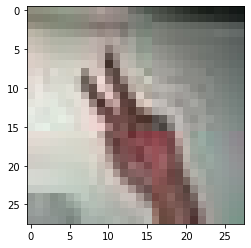

In [48]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨 : ',y_train[0])

In [49]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [50]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(256,(3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(512,(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(512,(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
# 모델 훈련
model.fit(x_train_norm, y_train, epochs = 15)

train_loss, train_accuracy = model.evaluate(x_train_norm, y_train, verbose = 2)
print('train_loss : {}'.format(train_loss))
print('train_accuracy : {}'.format(train_accuracy))

Epoch 1/15
42/42 [==============================] - 2s 26ms/step - loss: 1.1097 - accuracy: 0.4002
Epoch 2/15
42/42 [==============================] - 1s 27ms/step - loss: 0.9687 - accuracy: 0.5144
Epoch 3/15
42/42 [==============================] - 1s 23ms/step - loss: 0.6862 - accuracy: 0.6962
Epoch 4/15
42/42 [==============================] - 1s 23ms/step - loss: 0.3193 - accuracy: 0.8681
Epoch 5/15
42/42 [==============================] - 1s 23ms/step - loss: 0.1456 - accuracy: 0.9509
Epoch 6/15
42/42 [==============================] - 1s 23ms/step - loss: 0.1033 - accuracy: 0.9636
Epoch 7/15
42/42 [==============================] - 1s 23ms/step - loss: 0.0499 - accuracy: 0.9830
Epoch 8/15
42/42 [==============================] - 1s 23ms/step - loss: 0.0666 - accuracy: 0.9680
Epoch 9/15
42/42 [==============================] - 1s 23ms/step - loss: 0.0330 - accuracy: 0.9853
Epoch 10/15
42/42 [==============================] - 1s 22ms/step - loss: 0.0248 - accuracy: 0.9913
Epoch 11/

In [51]:
# 다른 값 예측한 경우에 대하여
'''
import random

predicted_result = model.predict(x_train)    #model 이 추론할 확률값
predicted_labels = np.argmax(predicted_result, axis = 1)

wrong = []
for i, _ in enumerate(predicted_labels):
    if predicted_labels[i] != y_train[i]:
        wrong.append(i)

samples = random.choices(population = wrong, k=3)

for n in samples:
    print("라벨 : " + str(y_train[n]) + ", 예측결과 : " + str(predicted_labels[n]))
    plt.imshow(x_train[n], cmap = plt.cm.binary)
    plt.show()
'''

'\nimport random\n\npredicted_result = model.predict(x_train)    #model 이 추론할 확률값\npredicted_labels = np.argmax(predicted_result, axis = 1)\n\nwrong = []\nfor i, _ in enumerate(predicted_labels):\n    if predicted_labels[i] != y_train[i]:\n        wrong.append(i)\n\nsamples = random.choices(population = wrong, k=3)\n\nfor n in samples:\n    print("라벨 : " + str(y_train[n]) + ", 예측결과 : " + str(predicted_labels[n]))\n    plt.imshow(x_train[n], cmap = plt.cm.binary)\n    plt.show()\n'

# TEST

In [52]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료")
print("------------------------------------------")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
print("주먹 이미지 resize 완료")
print("------------------------------------------")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료")
print("------------------------------------------")

100  images to be resized.
100 images resized.
가위 이미지 resize 완료
------------------------------------------
100  images to be resized.
100 images resized.
주먹 이미지 resize 완료
------------------------------------------
100  images to be resized.
100 images resized.
보 이미지 resize 완료
------------------------------------------


In [53]:
def load_data(img_path, number_of_data = 300):      
    #가위 : 0, 바위 : 1, 보 : 2
    img_size = 28
    color = 3
    #이미지 데이터와 라벨(가위:0,바위:1,보:2)데이터를 담을 행렬 생성
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype = np.int32).reshape(number_of_data,img_size,img_size,color)
    labels = np.zeros(number_of_data, dtype = np.int32)
    
    idx = 0
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:] = img    #데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0    #가위 : 0
        idx += 1
        
    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:] = img    #데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1    #바위 : 1
        idx += 1
        
    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:] = img    #데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2    #보 : 2
        idx += 1
        
    print("학습데이터 (x_train)의 이미지 갯수는", idx, "입니다.")
    return imgs, labels
    
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test) = load_data(image_dir_path)
x_test_norm = x_test/255.0

print("x_train shape : {}".format(x_test.shape))
print("y_train shape : {}".format(y_test.shape))

학습데이터 (x_train)의 이미지 갯수는 300 입니다.
x_train shape : (300, 28, 28, 3)
y_train shape : (300,)


라벨 :  0


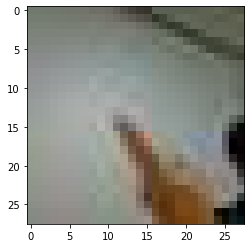

In [54]:
plt.imshow(x_test[0])
print('라벨 : ',y_test[0])

In [55]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print('test_loss : {}'.format(test_loss))
print('test_accuracy : {}'.format(test_accuracy))

10/10 - 0s - loss: 1.2505 - accuracy: 0.6033
test_loss : 1.2505178451538086
test_accuracy : 0.6033333539962769
